# Supervised Machine Learning: Regression

* price: price in US dollars (\$326–\$18,823)
* carat: weight of the diamond (0.2–5.01)
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour, from D (best) to J (worst)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0–10.74)
* y: width in mm (0–58.9)
* z: depth in mm (0–31.8)
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)
* table: width of top of diamond relative to widest point (43–95)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

diamonds = sns.load_dataset('diamonds')

from sklearn.model_selection import train_test_split
X = diamonds.drop(columns=['price'])
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
34530,0.33,Ideal,G,VVS1,62.0,56.0,4.45,4.48,2.77
26173,2.00,Very Good,I,VS2,59.5,62.0,8.13,8.21,4.86
20038,0.30,Good,H,SI1,63.4,58.0,4.21,4.24,2.68
41661,0.54,Ideal,J,VVS1,62.2,54.0,5.23,5.25,3.26
42306,0.41,Premium,D,VVS2,62.5,58.0,4.72,4.75,2.96


In [2]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [2]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


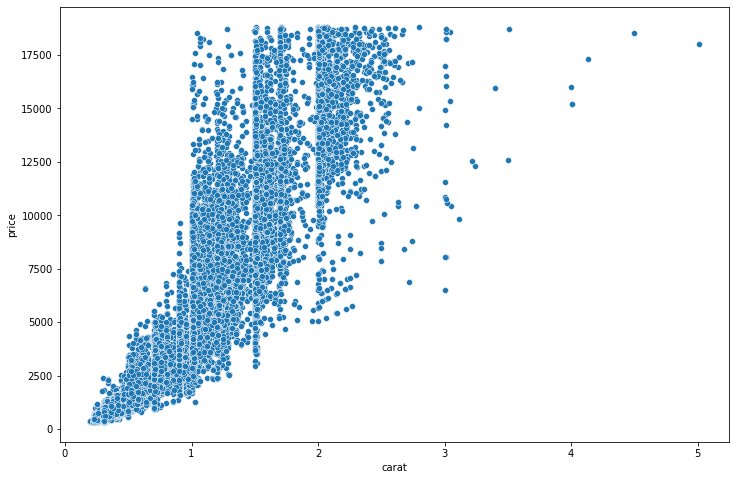

In [3]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X_train['carat'], y=y_train)
plt.show()

### Creating our first Linear Model

In [4]:
np.array(X_train['carat']).reshape(-1, 1)

array([[0.33],
       [2.  ],
       [0.3 ],
       ...,
       [1.24],
       [2.01],
       [0.82]])

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(np.array(X_train['carat']).reshape(-1, 1), y_train)


LinearRegression()

In [20]:
print(
    lm.coef_, 
    lm.intercept_
    )

[7752.35768657] -2254.5185037319475


Formula of a regression model:

y = a + b * X

where y is the target , X is the feature, b is the slope of the line and a is the y-intercept.

### Results on test set

In [23]:
lm.predict(np.array(X_test['carat']).reshape(-1, 1))

array([ 2086.80180075,  1699.18391642,  3172.13187687, ...,
        6195.55137463,  5497.83918284, 17203.89928957])

In [24]:
results = pd.DataFrame({
    'predictions':lm.predict(np.array(X_test['carat']).reshape(-1, 1)), 
    'true_values':y_test
})
results.head() 

,predictions,true_values
43149,2086.801801,1389
50113,1699.183916,2209
49263,3172.131877,2088
9661,5575.362760,4642
8500,6428.122105,4422


* Mean Squared Error (MSE): is calculated as the mean or average of the squared differences between predicted and expected target values.
$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}$$

In [48]:
mse_pre = (results
               .assign(diff = lambda x: (x.true_values - x.predictions)**2)
               .agg({'diff':{'sum','count'}}))
mse = mse_pre.loc['sum'] / mse_pre.loc['count']
mse

diff    2.367452e+06
dtype: float64

In [49]:
# check our results with sklearn metrics
mod_res = {}
mod_res['1st_iter'] = {}
from sklearn.metrics import mean_squared_error
mod_res['1st_iter']['mse'] = mean_squared_error(results.true_values, results.predictions)
mod_res['1st_iter']['mse']

2367452.0177661614

* Root Mean Squared Error (RMSE): 
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}}$$

In [50]:
rmse = (mse_pre.loc['sum'] / mse_pre.loc['count'])**0.5
rmse

diff    1538.652663
dtype: float64

* Mean Absolute Error (MAE)
$$MAE = \frac{1}{n}\sum_{i=1}^{n} |y_{i} - y_{e}|$$

In [52]:
mae_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions))
               .agg({'diff':{'sum','count'}}))
mod_res['1st_iter']['mae'] = mae_pre.loc['sum'] / mae_pre.loc['count']
mod_res['1st_iter']['mae']

diff    1010.730354
dtype: float64

In [53]:
# check our results with sklearn metrics
from sklearn.metrics import mean_absolute_error
mod_res['1st_iter']['mae'] = mean_absolute_error(results.true_values, results.predictions)
mod_res['1st_iter']['mae']

1010.730353672055

* Mean Absolute Percentage Error (MAPE)

$$MAPE = \frac{1}{n}\sum_{i=1}^{n} |\frac{y_{i} - y_{e}}{y_{i}}|$$

In [54]:
# Given that MAPE (mean absolute percentage error) doesn't exist in this version of sklearn, let's write a function:
def mean_abs_perc_error(y_true, y_pred):
    results = pd.DataFrame({
        'predictions':y_pred,
        'true_values':y_true
    })
    mape_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions)/x.true_values)
               .agg({'diff':{'sum','count'}}))
    mape = mape_pre.loc['sum'] / mape_pre.loc['count']
    return mape.values[0]

# from sklearn.metrics import mean_absolute_percentage_error
mod_res['1st_iter']['mape'] = mean_abs_perc_error(results['true_values'], results['predictions'])
mod_res['1st_iter']['mape']
mod_res

{'1st_iter': {'mae': 1010.730353672055,
  'mape': 0.38396468307089043,
  'mse': 2367452.0177661614,
  'rmse': 1538.6526631329637}}


        MSE: 2367452.0177661614
        RMSE: 1538.6526631329637
        MAE: 1010.730353672055
        MAPE: 0.38396468307089043
        
18818 340


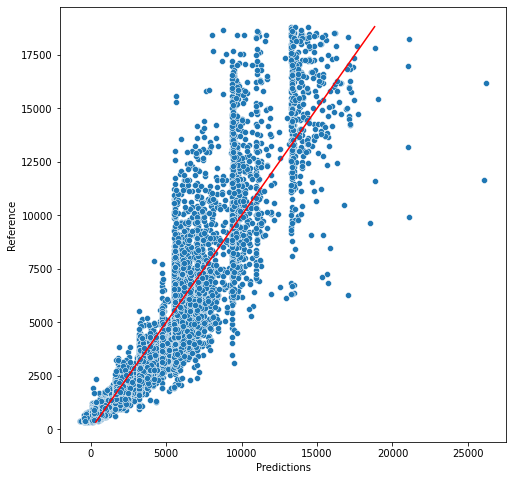

In [55]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        """
    )
    
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred)
    }

mod_res['1st_iter'] = plot_predictions(y_test, results['predictions'])